<a href="https://colab.research.google.com/github/shaestewart/atheris_sdm_project/blob/main/Atheris_SDM_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# === Step 1: Load dataset ===
df = pd.read_csv("iNaturalist-based Mapping of Atheris spp. - Observations Processed v2_flagged.csv")

# Clean up any stray spaces in headers
df.columns = df.columns.str.strip()

# Print columns so we can double-check
print("Columns in dataset:", df.columns.tolist())

# === Step 2: Select predictors (using *your exact column names*) ===
X = df[['Latitude', 'Longitude', 'Elevation (m)',
        'Biome', 'Climate', 'Habitat Type',
        'Forest Integrity', 'Area of Tree Coverage (%)']]

# Target variable (Species presence/classification)
y = df['Species']

# === Step 3: Handle categorical variables ===
X = pd.get_dummies(X)

# === Step 4: Train-test split ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# === Step 5: Train model ===
clf = RandomForestClassifier(n_estimators=200, random_state=42)
clf.fit(X_train, y_train)

# === Step 6: Evaluate ===
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

Columns in dataset: ['Observation ID', 'Date of Observation', 'Species', 'Common Name', 'Conservation Status', 'Latitude', 'Longitude', 'WGS84 DMS', 'Elevation (m)', 'Country/Region', 'Biome', 'Climate', 'Habitat Type', 'Forest Integrity', 'Area of Tree Coverage (%)', 'Canopy Coverage', 'Area Analyzed (kha)', 'Accuracy (m)', 'Source Reliability', 'Weight', 'Source (Link)', 'Observer Provided Feedback', 'Comment', 'Flag_For_Review']
                     precision    recall  f1-score   support

  Atheris broadleyi       0.00      0.00      0.00         0
 Atheris chlorechis       1.00      0.88      0.93         8
    Atheris hispida       0.00      0.00      0.00         4
   Atheris nitschei       1.00      1.00      1.00         8
Atheris rungweensis       1.00      1.00      1.00         3
 Atheris squamigera       0.78      0.95      0.86        19

           accuracy                           0.86        42
          macro avg       0.63      0.64      0.63        42
       weight

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_

Columns: ['Observation ID', 'Date of Observation', 'Species', 'Common Name', 'Conservation Status', 'Latitude', 'Longitude', 'WGS84 DMS', 'Elevation (m)', 'Country/Region', 'Biome', 'Climate', 'Habitat Type', 'Forest Integrity', 'Area of Tree Coverage (%)', 'Canopy Coverage', 'Area Analyzed (kha)', 'Accuracy (m)', 'Source Reliability', 'Weight', 'Source (Link)', 'Observer Provided Feedback', 'Comment', 'Flag_For_Review']

Classification Report:

                     precision    recall  f1-score   support

  Atheris broadleyi       0.00      0.00      0.00         0
 Atheris chlorechis       1.00      0.88      0.93         8
    Atheris hispida       0.00      0.00      0.00         4
   Atheris nitschei       1.00      1.00      1.00         8
Atheris rungweensis       1.00      1.00      1.00         3
 Atheris squamigera       0.78      0.95      0.86        19

           accuracy                           0.86        42
          macro avg       0.63      0.64      0.63        42

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_

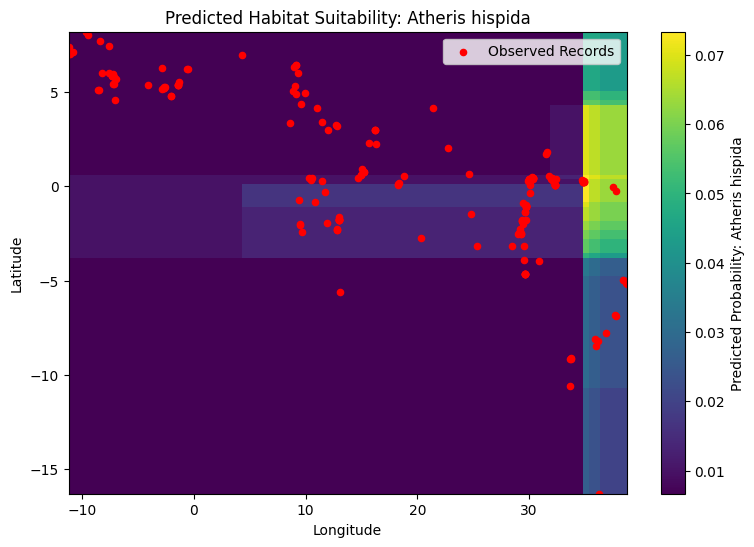

In [26]:
# === VHREC SDM Notebook: RandomForest + Probability Maps ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# === Step 1: Load dataset ===
df = pd.read_csv("iNaturalist-based Mapping of Atheris spp. - Observations Processed v2_flagged.csv")
df.columns = df.columns.str.strip()  # remove stray spaces
print("Columns:", df.columns.tolist())

# === Step 2: Define predictors and target ===
predictors = ['Latitude', 'Longitude', 'Elevation (m)',
              'Biome', 'Climate', 'Habitat Type',
              'Forest Integrity', 'Area of Tree Coverage (%)']

target = 'Species'

X = df[predictors]
y = df[target]

# Step 2a: Identify numeric vs categorical
numeric_cols = ['Latitude', 'Longitude', 'Elevation (m)', 'Area of Tree Coverage (%)']
categorical_cols = [c for c in X.columns if c not in numeric_cols]

# One-hot encode categorical variables
X_encoded = pd.get_dummies(X)

# === Step 3: Train/test split ===
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)
clf = RandomForestClassifier(n_estimators=300, random_state=42)
clf.fit(X_train, y_train)

# Evaluate
y_pred = clf.predict(X_test)
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# === Step 4: Build prediction grid for mapping ===
lat_min, lat_max = df['Latitude'].min(), df['Latitude'].max()
lon_min, lon_max = df['Longitude'].min(), df['Longitude'].max()

lat_grid = np.linspace(lat_min, lat_max, 100)
lon_grid = np.linspace(lon_min, lon_max, 100)

grid_points = []
for lat in lat_grid:
    for lon in lon_grid:
        row = [
            lat, lon,
            df['Elevation (m)'].mean(),
            df['Biome'].mode()[0],
            df['Climate'].mode()[0],
            df['Habitat Type'].mode()[0],
            df['Forest Integrity'].mode()[0],
            df['Area of Tree Coverage (%)'].mean()
        ]
        grid_points.append(row)

grid_df = pd.DataFrame(grid_points, columns=predictors)

# One-hot encode grid using same columns as training set
grid_encoded = pd.get_dummies(grid_df)
grid_encoded = grid_encoded.reindex(columns=X_encoded.columns, fill_value=0)

# === Step 5: Predict probabilities for each species ===
proba = clf.predict_proba(grid_encoded)  # shape: (num_grid_points, num_species)
species_classes = clf.classes_

# === Step 6: Plot probability heatmap for one species ===
species_to_plot = "Atheris hispida"
species_idx = list(species_classes).index(species_to_plot)
grid_probs = proba[:, species_idx].reshape(len(lat_grid), len(lon_grid))

plt.figure(figsize=(9,6))
plt.imshow(grid_probs, extent=[lon_min, lon_max, lat_min, lat_max],
           origin='lower', aspect='auto', cmap='viridis')
plt.colorbar(label=f"Predicted Probability: {species_to_plot}")
plt.scatter(df['Longitude'], df['Latitude'], c='red', s=20, label='Observed Records')
plt.title(f"Predicted Habitat Suitability: {species_to_plot}")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()
plt.show()

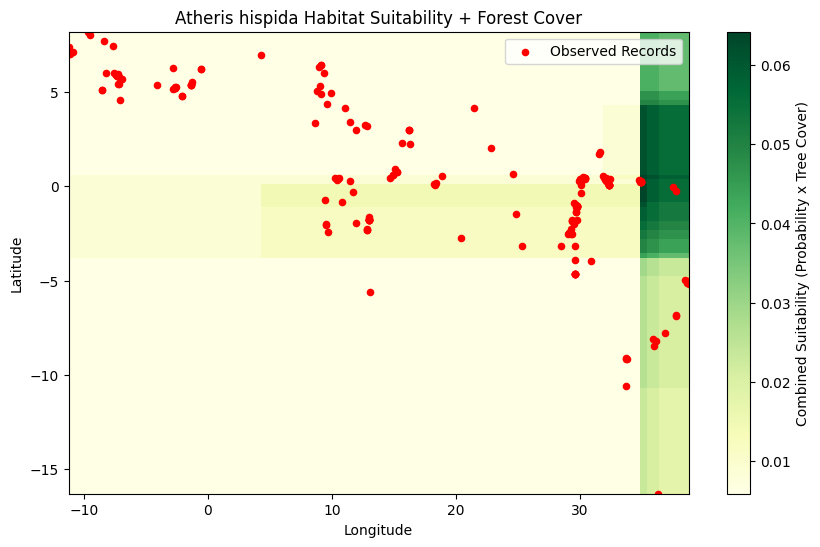

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# === Step 1: Use previously predicted grid_probs for A. chlorechis ===
# grid_probs shape: (lat_grid.size, lon_grid.size)

# === Step 2: Get the tree cover for each grid cell ===
# For simplicity, use mean Area of Tree Coverage (%) from your dataset
tree_cover_value = df['Area of Tree Coverage (%)'].mean()
tree_cover_grid = np.full(grid_probs.shape, tree_cover_value)  # same shape as prob grid

# === Step 3: Combine probability with tree cover (simple multiplication) ===
# This is a quick way to emphasize areas that are both suitable AND forested
combined_suitability = grid_probs * (tree_cover_grid / 100.0)

# === Step 4: Plot ===
plt.figure(figsize=(10,6))
plt.imshow(combined_suitability, extent=[df['Longitude'].min(), df['Longitude'].max(),
                                        df['Latitude'].min(), df['Latitude'].max()],
           origin='lower', aspect='auto', cmap='YlGn')
plt.colorbar(label='Combined Suitability (Probability x Tree Cover)')
plt.scatter(df['Longitude'], df['Latitude'], c='red', s=20, label='Observed Records')
plt.title('Atheris hispida Habitat Suitability + Forest Cover')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()